# Description of data 

1. Fixed acidity: are non-volatile acids that do not evaporate readily
2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
3. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
4. Residual sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)
5. Chlorides: the amount of salt in the wine
6. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
7. Total Sulfur Dioxide: is the amount of free + bound forms of SO2
8. Density: sweeter wines have a higher density
9. pH: the level of acidity
10. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
11. Alcohol: the amount of alcohol in wine

Given  this 11 features our goal is to predict wine quality.

#### Exploratory Data Analysis

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import warnings
import missingno as ms
warnings.filterwarnings('ignore')



In [93]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#Find out the total number of rows and columns in the dataset 
df.shape

(6497, 13)

In [6]:
# Checking types of wine
df.type.unique()

array(['white', 'red'], dtype=object)

In [ ]:
# Information about the dataset
df.info()

In [7]:
# Checking any missing values in the data.
mis = pd.DataFrame(df.isnull().sum())
mis

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [94]:
# Using mean to fill missing values of the data
df.fillna(df.mean(), inplace = True)

In [95]:
# Changing categorical feature to numerical
df["type"].replace({"white": 1, "red": 0}, inplace=True)


Text(0.5, 1.0, 'Correlation Heatmap')

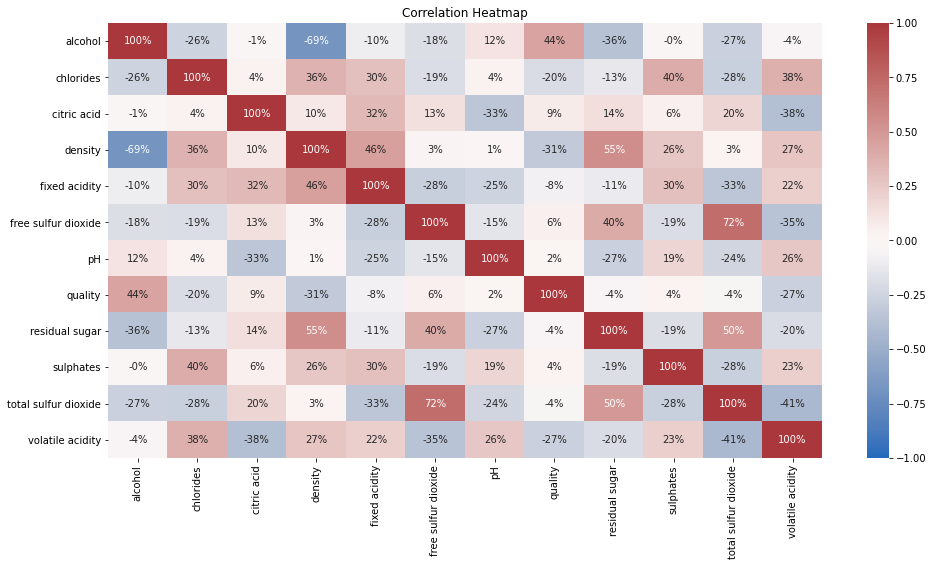

In [32]:
plt.figure(figsize = (16,8))
heatmap = sns.heatmap(df[df.columns.difference(['type'])].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.0%', cmap = 'vlag')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12})

In [96]:
#Checking for Duplicates

print("Number of duplicated rows :", df.duplicated().sum())
df = df.drop_duplicates()
df

Number of duplicated rows : 1168


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [11]:
# Get a Statistical Overview using Describe
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,0.744980,7.216573,0.344117,0.318738,5.053985,0.056668,30.060143,114.189341,0.994536,3.224424,0.533266,10.548539,5.796022
std,0.435913,1.317955,0.168102,0.147075,4.503166,0.036838,17.815588,56.781422,0.002966,0.160140,0.149668,1.186134,0.879922
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,1.000000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [34]:
# Correlations in descending order
correlations = df[df.columns.difference(['type'])].corr()['quality'].sort_values(ascending = False)
print(correlations)

quality                 1.000000
alcohol                 0.469555
citric acid             0.098764
free sulfur dioxide     0.054456
sulphates               0.041396
pH                      0.039946
total sulfur dioxide   -0.050387
residual sugar         -0.057253
fixed acidity          -0.080554
chlorides              -0.202312
volatile acidity       -0.264212
density                -0.326978
Name: quality, dtype: float64


In [35]:
# Filter the features with correlations greater than 0.2
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
citric acid             False
free sulfur dioxide     False
sulphates               False
pH                      False
total sulfur dioxide    False
residual sugar          False
fixed acidity           False
chlorides                True
volatile acidity         True
density                  True
Name: quality, dtype: bool


Text(0.5, 1.0, 'The correlation between every feature and target(Quality)')

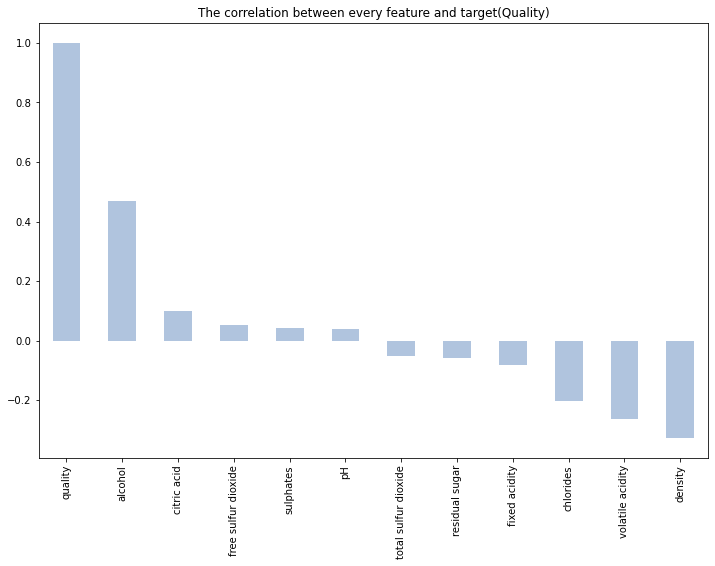

In [36]:
plt.figure(figsize = (12,8))
correlations.plot(kind = 'bar', color = "lightsteelblue")
plt.title("The correlation between every feature and target(Quality)")

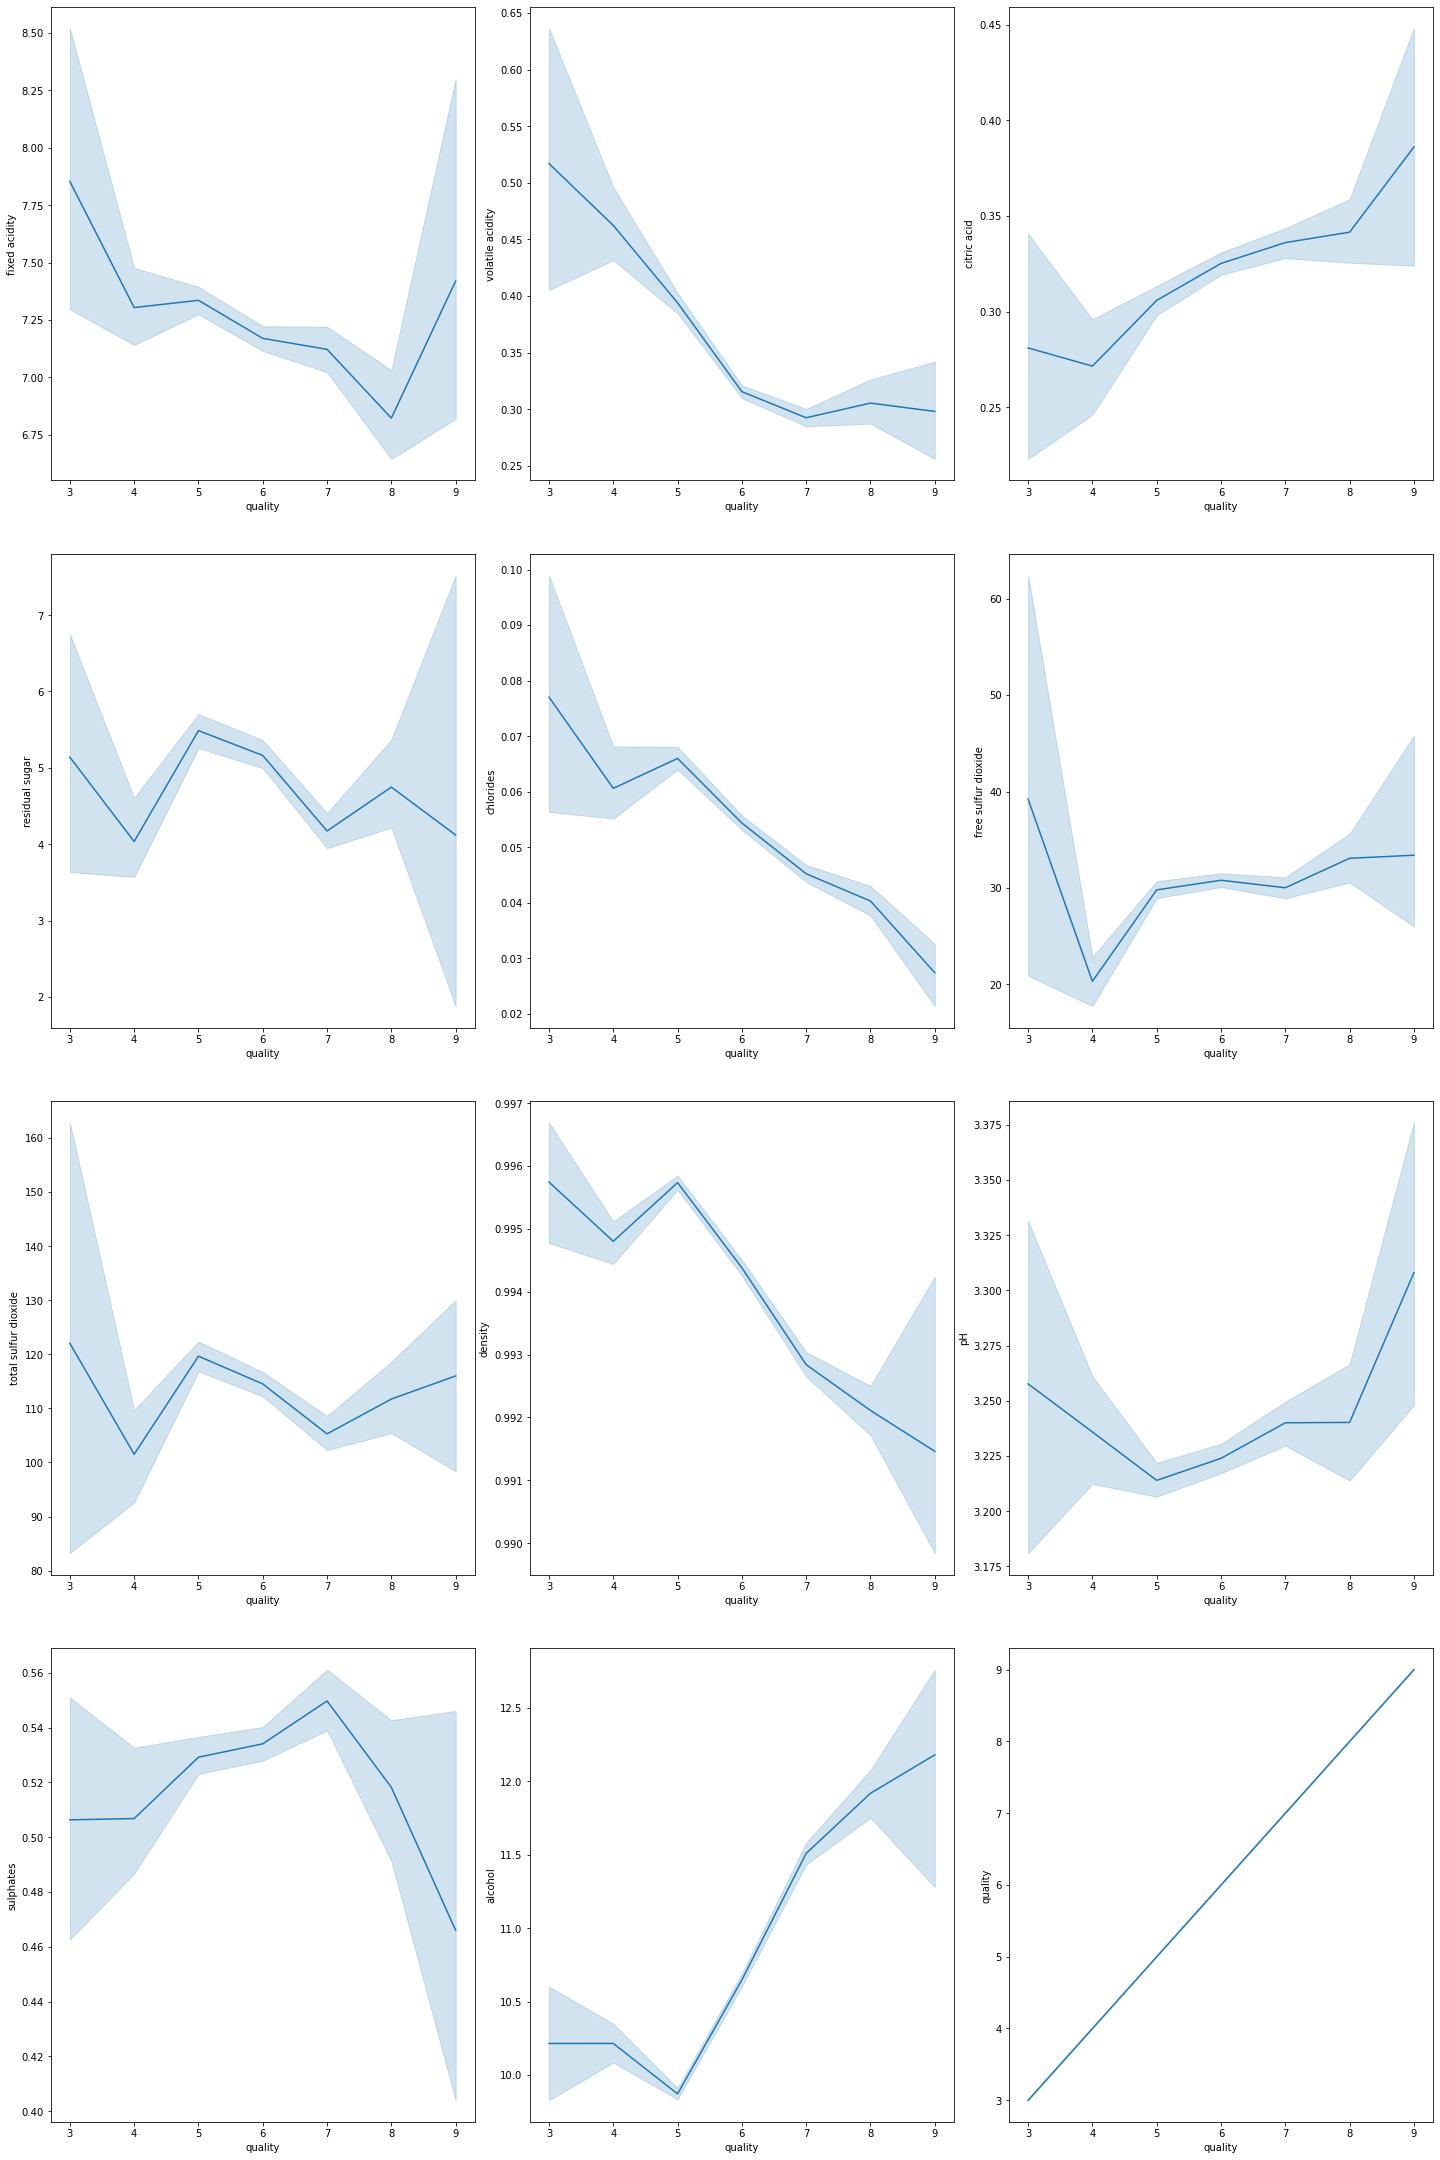

In [12]:
#The correlation between each feature and target variable separately 
fig, ax = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 30))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.lineplot(data = df, x = "quality", y = col,ax = ax[index])
        index += 1
        
plt.tight_layout(pad = 0.7, w_pad = 0.5, h_pad = 4)

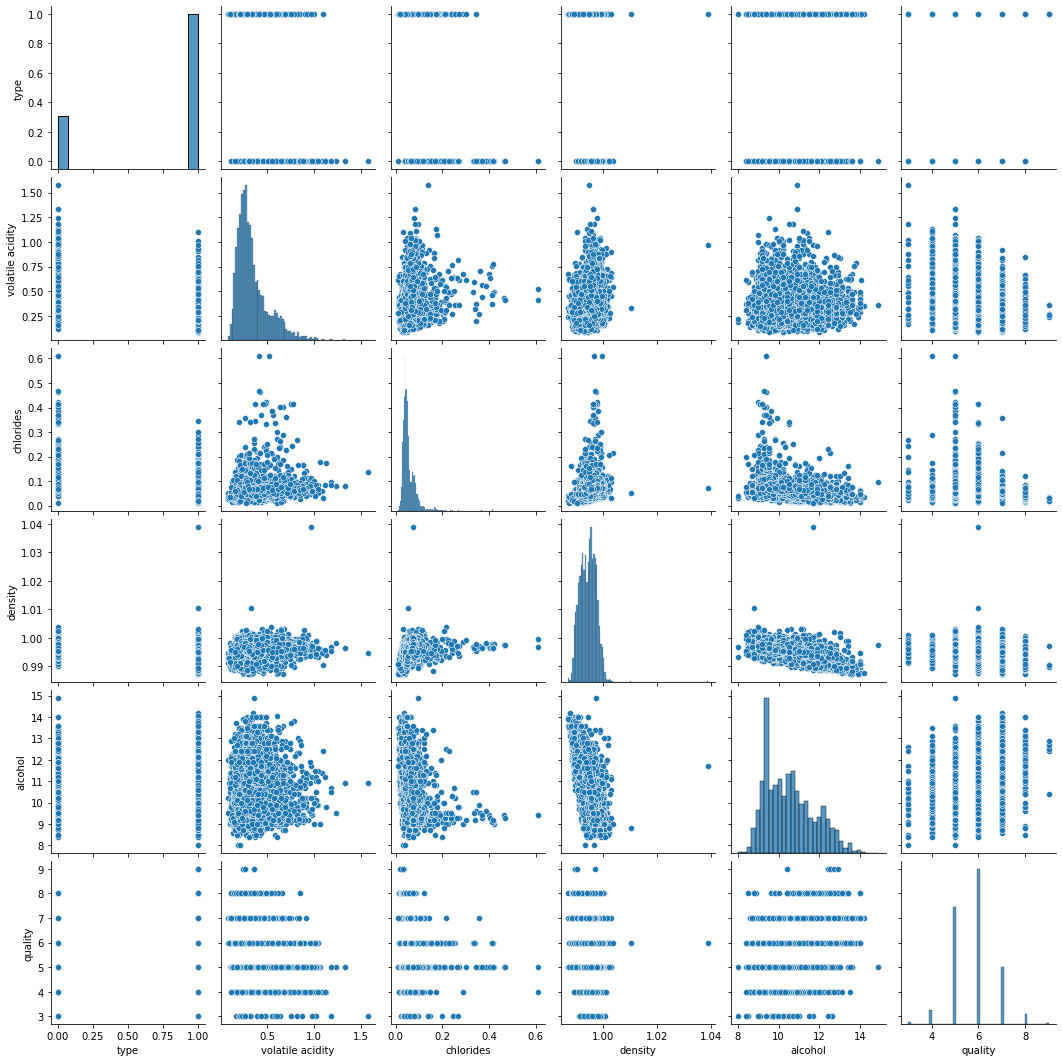

In [190]:
# Distribution of each feature
sns.pairplot(df.drop(columns = ['fixed acidity', 'total sulfur dioxide', 'residual sugar', 'pH','sulphates', 'free sulfur dioxide', 'citric acid']))

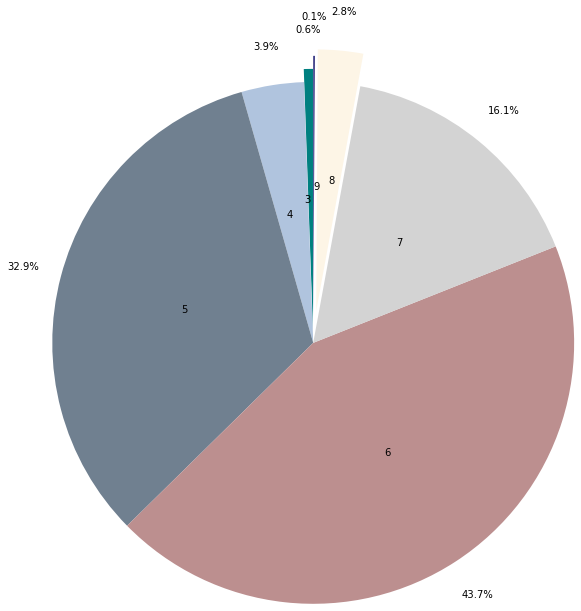

In [13]:
# Distribution of Quality by classes(%)
slices = list(df['quality'].value_counts().sort_index())
classes = np.arange(3, 10)
pie_colors = ["teal", "lightsteelblue", "slategray", "rosybrown", "lightgrey", "oldlace", "midnightblue", "slategrey", "lavender"]

plt.figure(figsize = (6, 3))
plt.pie(slices, labels = classes, radius = 4, explode = (0.2, 0, 0, 0, 0, 0.5, 0.4), autopct = "%1.1f%%", colors = pie_colors, startangle = 90,   pctdistance = 1.15, labeldistance = 0.5)

plt.show()

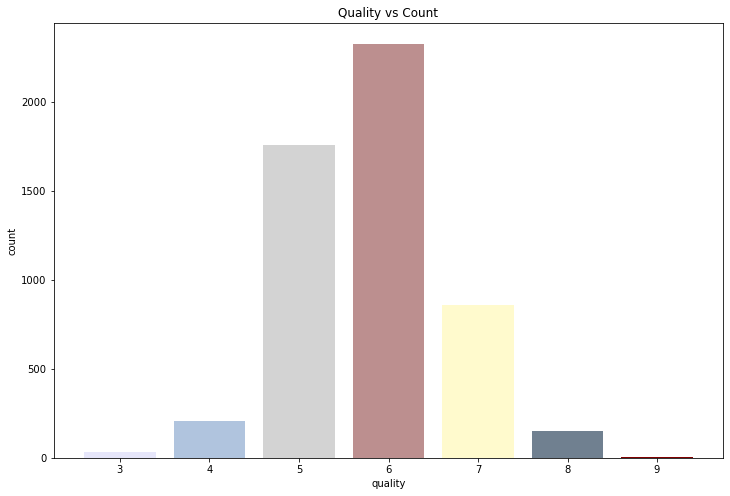

In [14]:
# Distribution of Quality by classes(count)
plt.figure(figsize = (12, 8))
qualities = np.arange(3, 10)
count = df['quality'].value_counts().sort_index()

plt.bar(qualities, count, color = {"teal", "maroon", "lightsteelblue", "rosybrown", "lightgrey", "lemonchiffon", "seashell", "slategrey", "lavender"})
plt.title('Quality vs Count')
plt.xlabel('quality')
plt.ylabel('count')

plt.show()

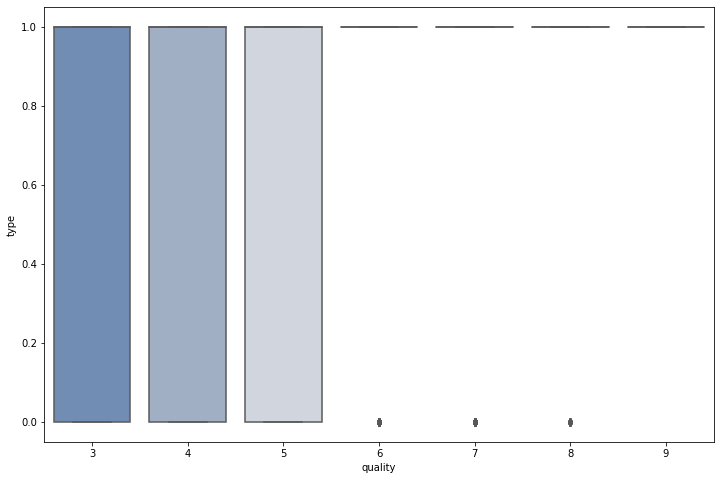

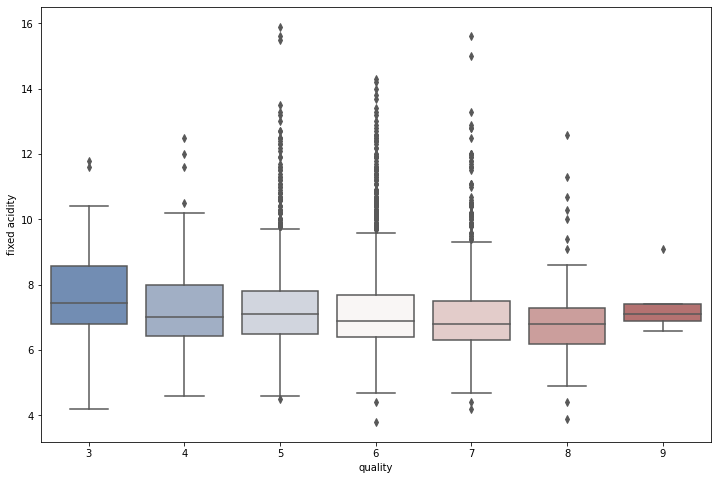

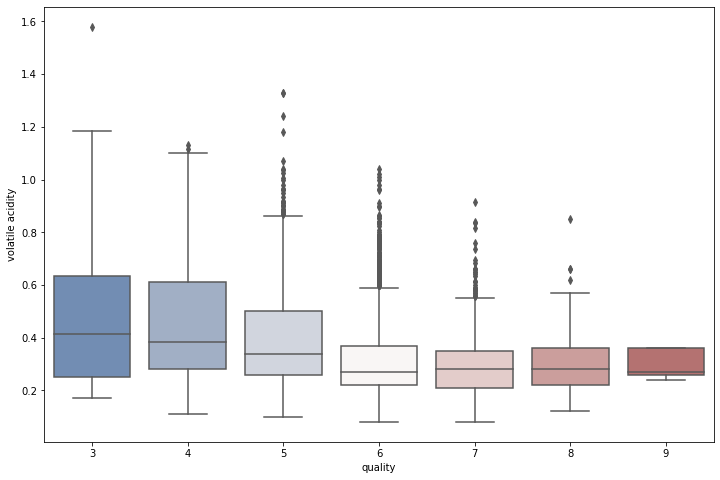

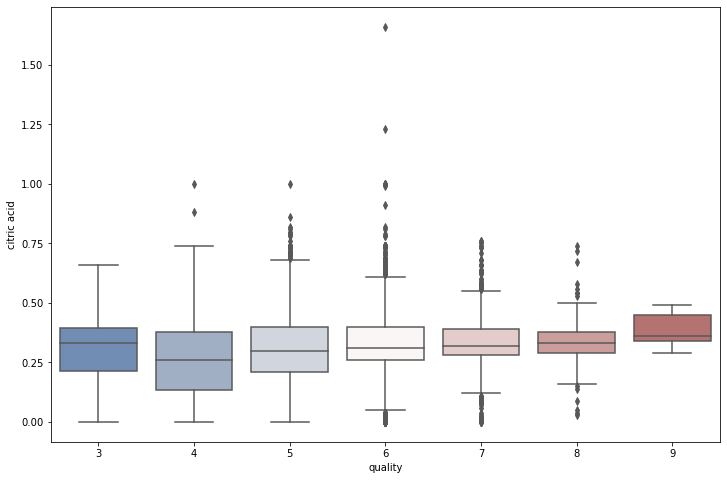

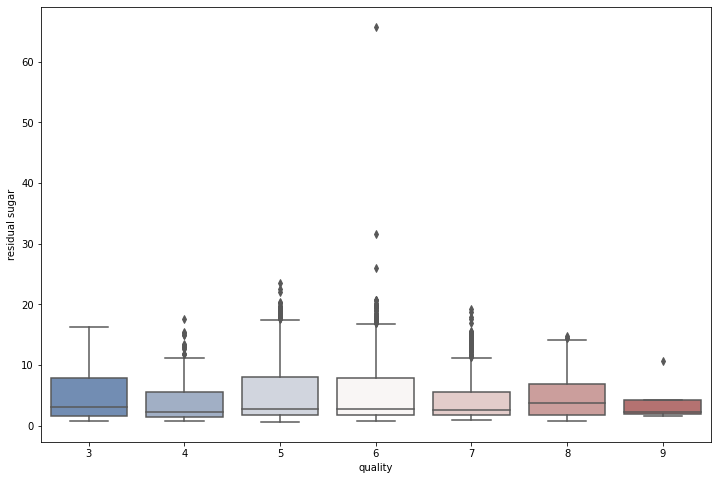

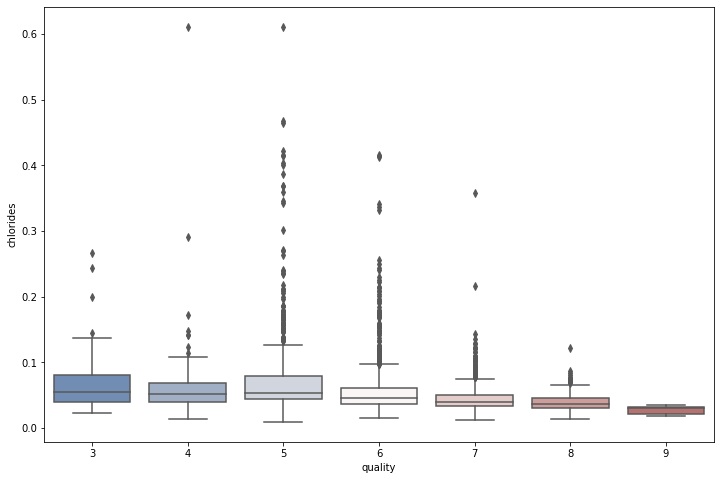

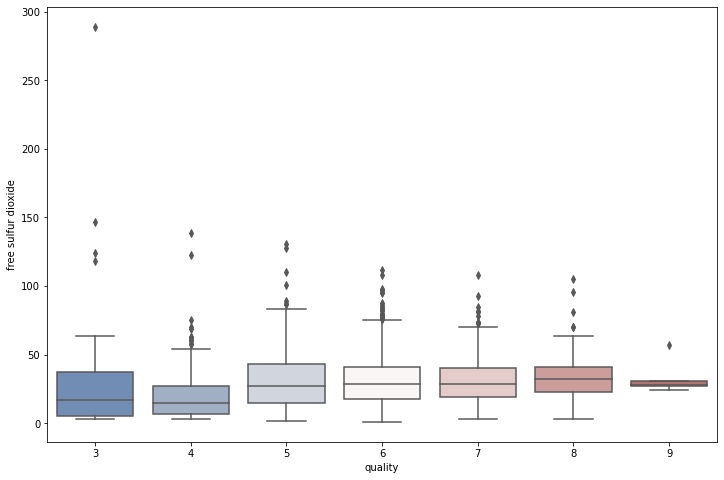

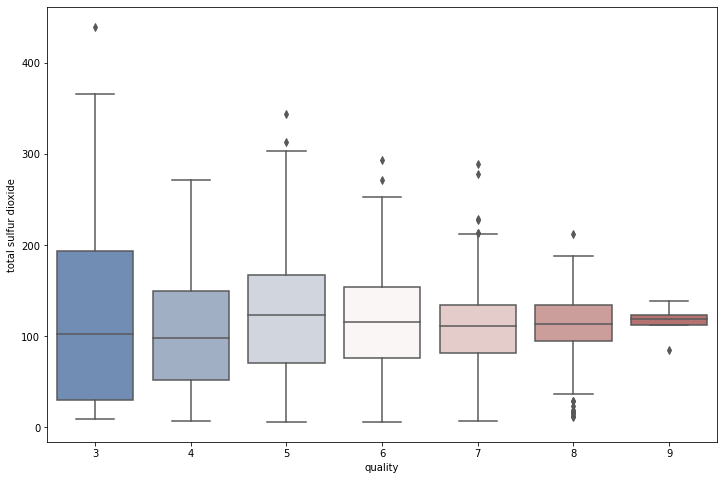

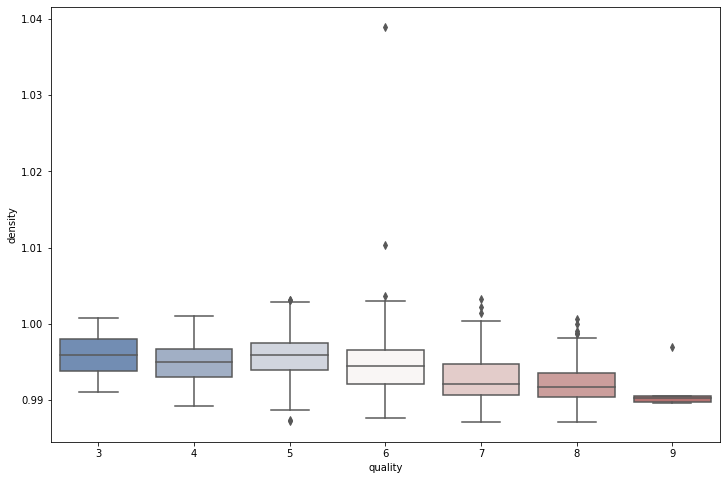

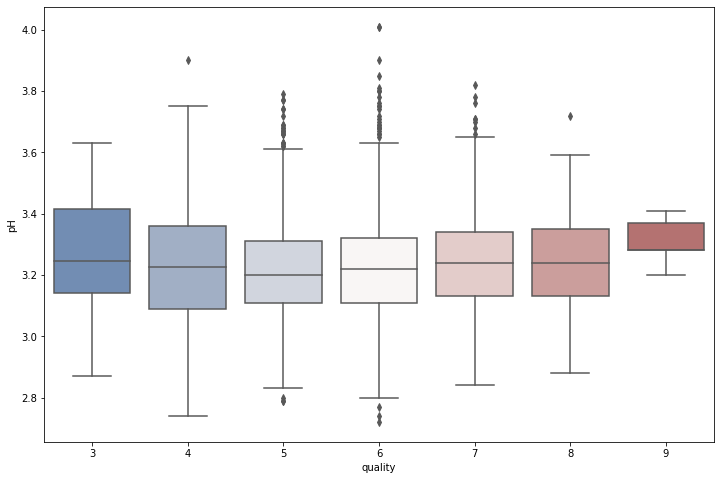

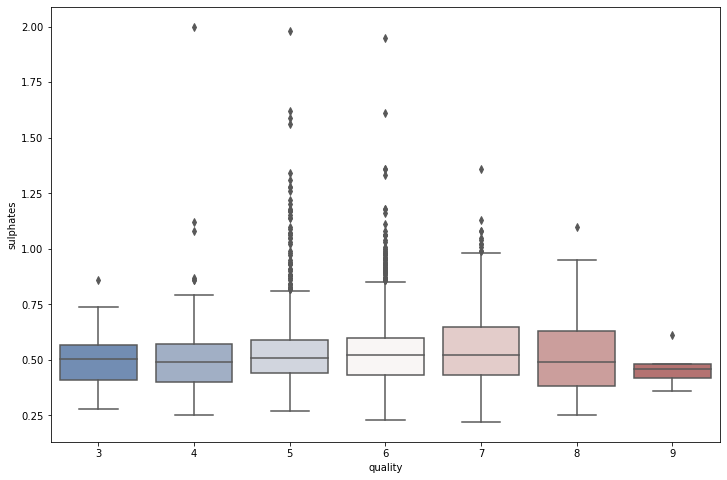

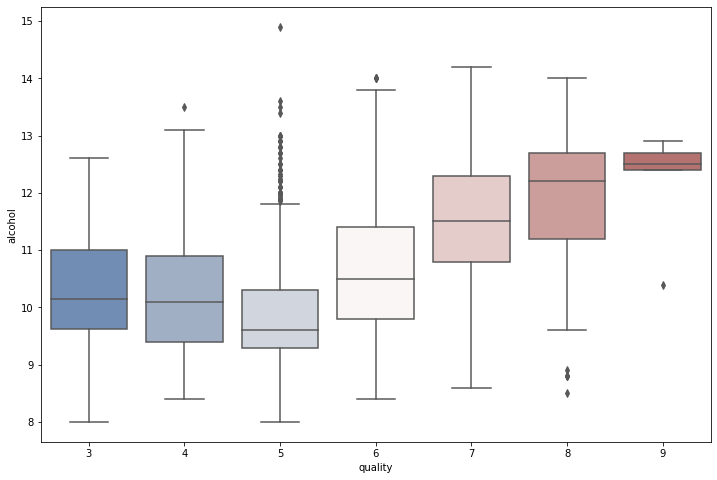

In [15]:
# By box plot we get visual sense of an entire range of data, and also it tells about outliers and their values. 
for i in df.columns:
    if i == "quality":
        break
    plt.figure(figsize = (12, 8))
    sns.boxplot("quality", i , data = df, palette = "vlag")
    
    plt.show()

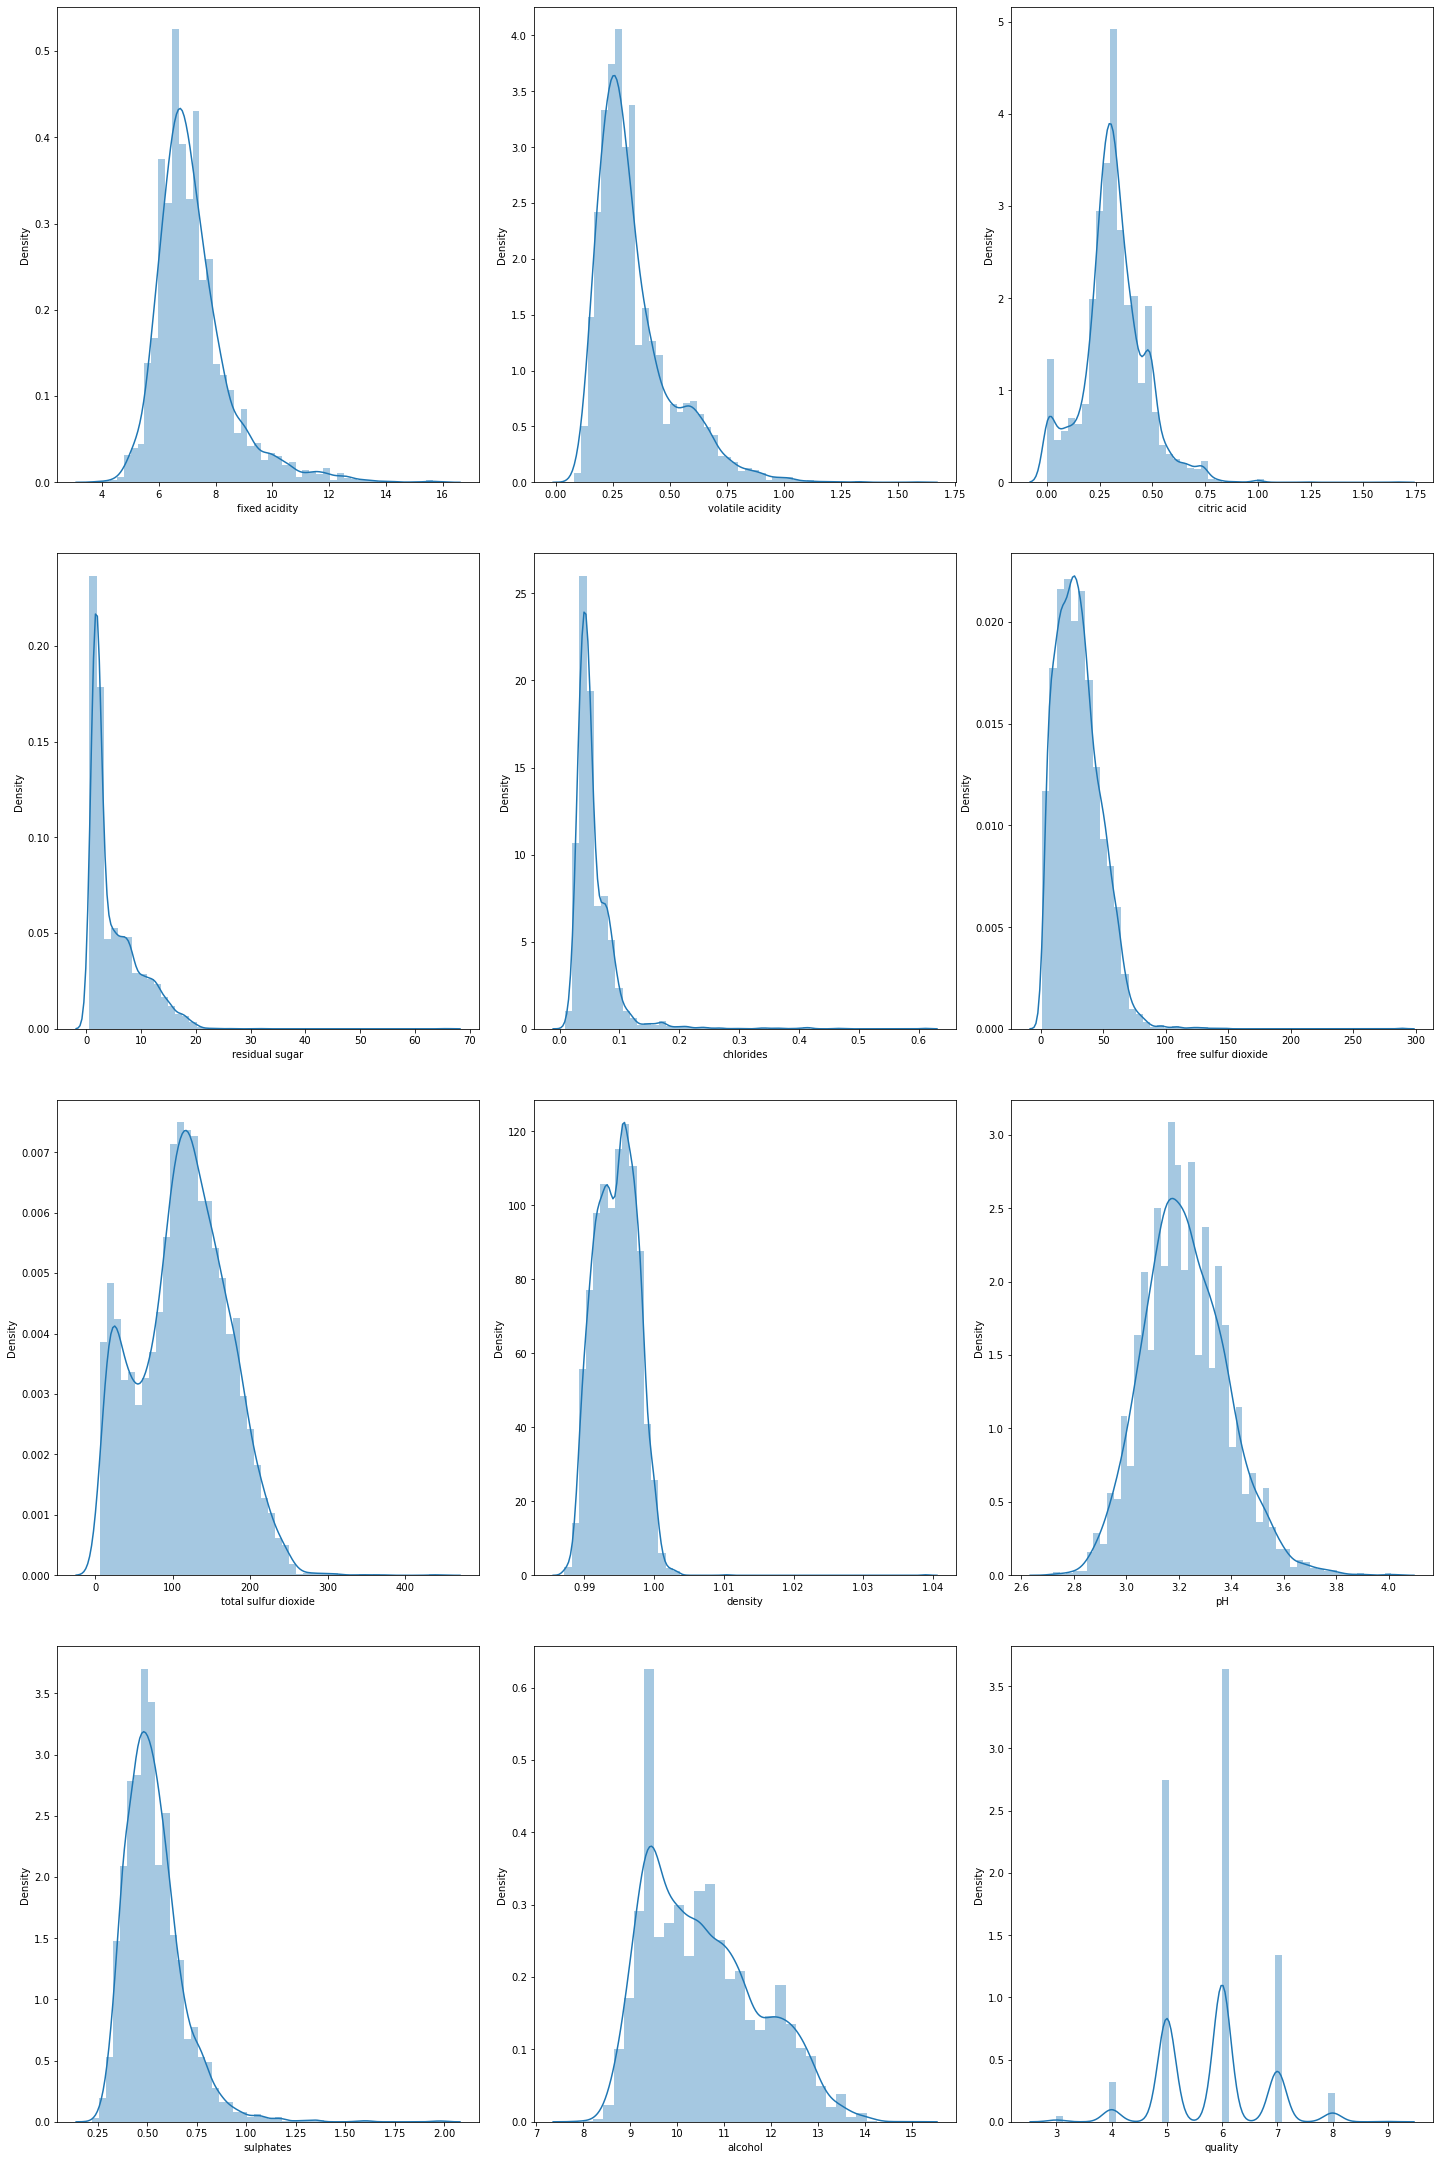

In [16]:
# distplots for detecting multi-variate outlier analysis
fig, ax = plt.subplots(ncols = 3, nrows = 4, figsize = (20, 30))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
        
plt.tight_layout(pad = 0.7,w_pad = 0.5,h_pad = 4)

# Feature Engineering

In [9]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
6,1,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.820000,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [97]:
# As total Sulfur Dioxide is the amount of free + bound forms of SO2, we can get rid of free sulfur dioxide
df['bound sulfur dioxide'] = df['total sulfur dioxide'] - df['free sulfur dioxide']
df.drop(['total sulfur dioxide'], axis=1, inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
0,1,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,125.0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,118.0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,67.0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,139.0
6,1,6.2,0.320,0.16,7.0,0.045,30.0,0.99490,3.18,0.470000,9.6,6,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.820000,9.5,6,10.0
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,12.0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,12.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,12.0


Text(0.5, 1.0, 'Correlation Heatmap')

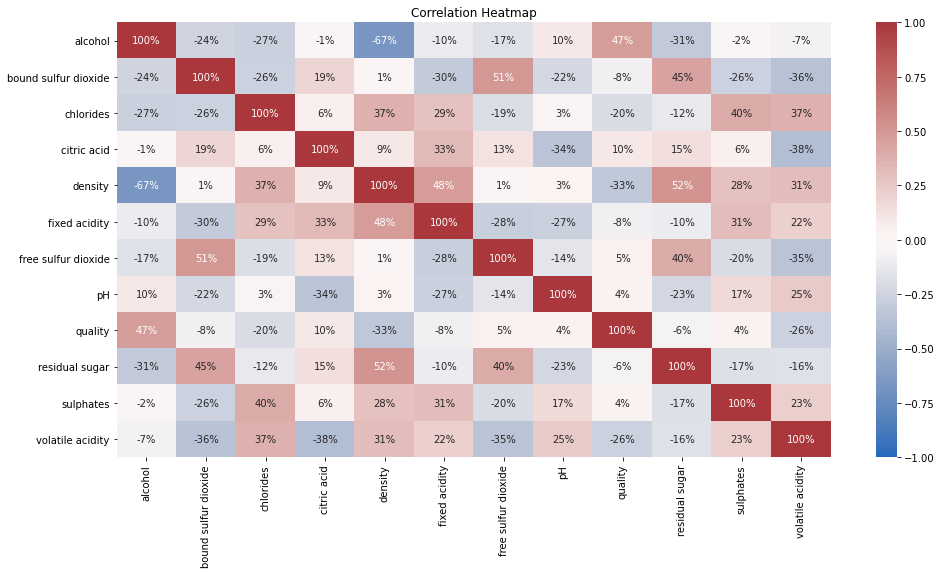

In [38]:
plt.figure(figsize = (16,8))
heatmap = sns.heatmap(df[df.columns.difference(['type'])].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.0%', cmap = 'vlag')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12})

In [ ]:
df

In [39]:
# Apply SelectKBest class to extract top 11 best features
best_features = SelectKBest(k = 11)
fit = best_features.fit(df[df.columns.difference(['quality', 'type'])], df['quality'])
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(df[df.columns.difference(['type'])].columns)

# concat two dataframes for better visualization 
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']  # naming the dataframe columns
print(feature_scores.nlargest(11, 'Score'))

                 Feature       Score
0                alcohol  309.027403
4                density  131.033013
10             sulphates   80.753716
2              chlorides   43.382787
6    free sulfur dioxide   13.215029
1   bound sulfur dioxide   10.636802
8                quality   10.421989
3            citric acid    9.695984
5          fixed acidity    7.210049
9         residual sugar    3.617058
7                     pH    3.478469


In [98]:
df.drop(columns=['sulphates','pH','fixed acidity'], axis=1, inplace=True)
df

,type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,alcohol,quality,bound sulfur dioxide
0,1,0.270,0.36,20.7,0.045,45.0,1.00100,8.8,6,125.0
1,1,0.300,0.34,1.6,0.049,14.0,0.99400,9.5,6,118.0
2,1,0.280,0.40,6.9,0.050,30.0,0.99510,10.1,6,67.0
3,1,0.230,0.32,8.5,0.058,47.0,0.99560,9.9,6,139.0
6,1,0.320,0.16,7.0,0.045,30.0,0.99490,9.6,6,106.0
...,...,...,...,...,...,...,...,...,...,...
6491,0,0.620,0.08,1.9,0.068,28.0,0.99651,9.5,6,10.0
6492,0,0.600,0.08,2.0,0.090,32.0,0.99490,10.5,5,12.0
6493,0,0.550,0.10,2.2,0.062,39.0,0.99512,11.2,6,12.0
6495,0,0.645,0.12,2.0,0.075,32.0,0.99547,10.2,5,12.0


In [99]:
# here we drop 3 features which have low score
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape # cleaning step

(5041, 10)

In [29]:
df

,type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,bound sulfur dioxide,density,alcohol,quality
1,1,0.300,0.34,1.6,0.049,14.0,118.0,0.99400,9.5,6
2,1,0.280,0.40,6.9,0.050,30.0,67.0,0.99510,10.1,6
3,1,0.230,0.32,8.5,0.058,47.0,139.0,0.99560,9.9,6
6,1,0.320,0.16,7.0,0.045,30.0,106.0,0.99490,9.6,6
9,1,0.220,0.43,1.5,0.044,28.0,101.0,0.99380,11.0,6
...,...,...,...,...,...,...,...,...,...,...
6491,0,0.620,0.08,1.9,0.068,28.0,10.0,0.99651,9.5,6
6492,0,0.600,0.08,2.0,0.090,32.0,12.0,0.99490,10.5,5
6493,0,0.550,0.10,2.2,0.062,39.0,12.0,0.99512,11.2,6
6495,0,0.645,0.12,2.0,0.075,32.0,12.0,0.99547,10.2,5


In [100]:
# dropping target variable
y = df['quality']
y_copy = y # for further vizualization
df.drop(columns='quality', inplace=True)
df

,type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,alcohol,bound sulfur dioxide
1,1,0.300,0.34,1.6,0.049,14.0,0.99400,9.5,118.0
2,1,0.280,0.40,6.9,0.050,30.0,0.99510,10.1,67.0
3,1,0.230,0.32,8.5,0.058,47.0,0.99560,9.9,139.0
6,1,0.320,0.16,7.0,0.045,30.0,0.99490,9.6,106.0
9,1,0.220,0.43,1.5,0.044,28.0,0.99380,11.0,101.0
...,...,...,...,...,...,...,...,...,...
6491,0,0.620,0.08,1.9,0.068,28.0,0.99651,9.5,10.0
6492,0,0.600,0.08,2.0,0.090,32.0,0.99490,10.5,12.0
6493,0,0.550,0.10,2.2,0.062,39.0,0.99512,11.2,12.0
6495,0,0.645,0.12,2.0,0.075,32.0,0.99547,10.2,12.0


In [32]:
y.shape

(5041,)

In [101]:
# MinMaxScaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df

,type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,alcohol,bound sulfur dioxide
0,1.0,0.287582,0.453333,0.055866,0.253165,0.158537,0.429551,0.194690,0.527523
1,1.0,0.261438,0.533333,0.351955,0.259494,0.353659,0.498130,0.300885,0.293578
2,1.0,0.196078,0.426667,0.441341,0.310127,0.560976,0.529302,0.265487,0.623853
3,1.0,0.313725,0.213333,0.357542,0.227848,0.353659,0.485661,0.212389,0.472477
4,1.0,0.183007,0.573333,0.050279,0.221519,0.329268,0.417082,0.460177,0.449541
...,...,...,...,...,...,...,...,...,...
5036,0.0,0.705882,0.106667,0.072626,0.373418,0.329268,0.586035,0.194690,0.032110
5037,0.0,0.679739,0.106667,0.078212,0.512658,0.378049,0.485661,0.371681,0.041284
5038,0.0,0.614379,0.133333,0.089385,0.335443,0.463415,0.499377,0.495575,0.041284
5039,0.0,0.738562,0.160000,0.078212,0.417722,0.378049,0.521197,0.318584,0.041284


In [44]:
# Dividing wine quality as bad, normal and good types
quality = y
category = []

for i in quality:
    if i < 4.5:
        category.append("bad")
    elif i < 6.5:
        category.append("medium")
    else:
        category.append("good")
        
y = pd.DataFrame(category)



# Model Selection

In [45]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

###### Logistic Regression

In [46]:
y.value_counts()

medium    3868
good       990
bad        183
dtype: int64

In [51]:
lgr = LogisticRegression(random_state = 0, class_weight = {'bad': 3.5, 'medium': 0.77, 'good': 0.99})
score = cross_val_score(lgr, X_train, y_train, cv = 10)
lgr_score = score.mean()
print('Logistic regression accuracy on train data\n', lgr_score)


Logistic regression accuracy on train data
 0.7633970469007199


In [52]:
y_pred = cross_val_predict(lgr, X_test, y_test, cv = 10)
print('Logistic regression accuracy on test data\n', metrics.accuracy_score(y_test, y_pred))


Logistic regression accuracy on test data
 0.7918731417244796


In [50]:
print('Logistic regression with cv:\n\n ', metrics.classification_report(y_test, y_pred))

Logistic regression with cv:

                precision    recall  f1-score   support

         bad       0.50      0.06      0.11        32
        good       0.55      0.36      0.43       192
      medium       0.83      0.93      0.87       785

    accuracy                           0.79      1009
   macro avg       0.63      0.45      0.47      1009
weighted avg       0.76      0.79      0.77      1009



Feature importance with logistic regression

Feature: 0, Score: 2.26411
Feature: 1, Score: 2.92878
Feature: 2, Score: -0.20410
Feature: 3, Score: -0.90279
Feature: 4, Score: 0.72851
Feature: 5, Score: -3.20881
Feature: 6, Score: -0.18252
Feature: 7, Score: 1.29474
Feature: 8, Score: -2.40924


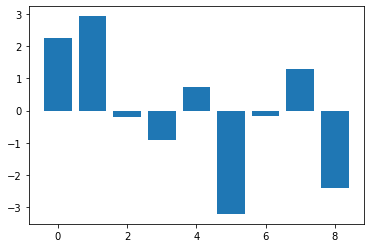

In [149]:
print('Feature importance with logistic regression\n')
lgr.fit(X_train, y_train)
importance = lgr.coef_[0]
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###### K nearest neighbours

In [53]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print('Knn train score without cv \n', cross_val_score(knn, X_train, y_train).mean())


Knn train score without cv 
 0.7688510274551765


In [181]:
print('Knn without cross validation \n\n', classification_report(y_test, pred_knn))

Knn without cross validation 

               precision    recall  f1-score   support

         bad       0.33      0.03      0.06        32
        good       0.58      0.48      0.53       192
      medium       0.85      0.91      0.88       785

    accuracy                           0.80      1009
   macro avg       0.59      0.48      0.49      1009
weighted avg       0.78      0.80      0.79      1009



In [54]:
# Knn with cross validation
k_range = list(range(5, 50, 2))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [55]:
best_knn = grid.best_estimator_
grid.best_params_

{'n_neighbors': 33, 'weights': 'distance'}

In [178]:
y_train_knn = grid.predict(X_train)
print('Knn train score with cv \n', metrics.accuracy_score(y_train, y_train_knn))
y_pred_knn = grid.predict(X_test)
print('Knn test score with cv\n', metrics.accuracy_score(y_test, y_pred_knn))

Knn train score with cv 
 1.0
Knn test score with cv
 0.798810703666997


In [179]:
print('Knn with cross validation \n\n', metrics.classification_report(y_test, y_pred_knn))

Knn with cross validation 

               precision    recall  f1-score   support

         bad       0.00      0.00      0.00        32
        good       0.61      0.31      0.41       192
      medium       0.82      0.95      0.88       785

    accuracy                           0.80      1009
   macro avg       0.48      0.42      0.43      1009
weighted avg       0.75      0.80      0.76      1009



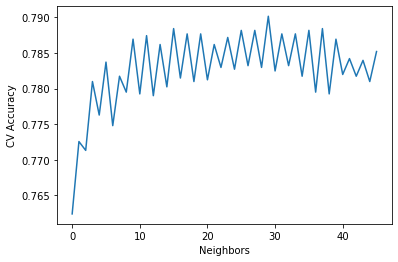

In [114]:
plt.plot(grid.cv_results_['mean_test_score'])
plt.xlabel('Neighbors')
plt.title('Neighbours vs Accuracy')
plt.ylabel('CV Accuracy');

In [102]:
from ipywidgets import interact, IntSlider
quality = y_copy.values
category = []
for i in quality:
    if i < 4.5:
        category.append(0) #table wine
    elif i < 6.5:
        category.append(1) #premium wine
    else:
        category.append(2) #fine wine

y_copy = pd.DataFrame(category)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(df, y_copy, test_size=0.2, random_state=42)

def plot_neighbors(n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    mse = np.zeros(n_neighbors)

    for n in range(1, n_neighbors):
        knn.set_params(n_neighbors=n)
        knn.fit(X_train_c, y_train_c)
        mse[n-1] = metrics.accuracy_score(y_test_c, knn.predict(X_test_c))
        
    plt.plot(mse) 
    plt.xlabel('neighbours')
    plt.ylabel('Test Accuracy')
        

    
interact(plot_neighbors, n_neighbors=IntSlider(min=1, max=40, step=2, description='neighbors'));

interactive(children=(IntSlider(value=1, description='neighbors', max=40, min=1, step=2), Output()), _dom_clas…

###### Random Forest Classifier

In [57]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [129]:
print('Random Forest without cv\n\n', classification_report(y_test, rf_pred))

Random Forest without cv

               precision    recall  f1-score   support

         bad       0.60      0.09      0.16        32
        good       0.62      0.31      0.42       192
      medium       0.82      0.95      0.88       785

    accuracy                           0.80      1009
   macro avg       0.68      0.45      0.49      1009
weighted avg       0.78      0.80      0.77      1009



Feature importance with random forest

Feature: 0, Score: 0.00495
Feature: 1, Score: 0.11615
Feature: 2, Score: 0.10396
Feature: 3, Score: 0.11213
Feature: 4, Score: 0.11284
Feature: 5, Score: 0.11244
Feature: 6, Score: 0.12624
Feature: 7, Score: 0.14154
Feature: 8, Score: 0.16975


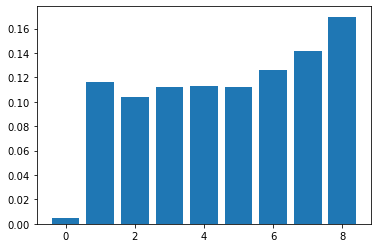

In [148]:
print('Feature importance with random forest\n')
importance = rf.feature_importances_
# summarize feature importance
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


<AxesSubplot:>

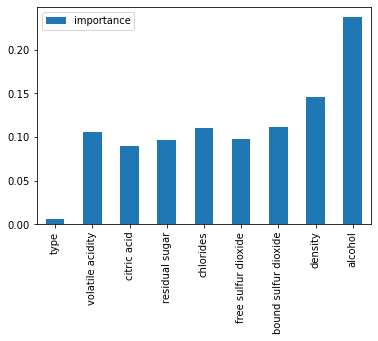

In [150]:
#Random forest with cross validation
feature_names = df.columns
forest = RandomForestClassifier(n_estimators=50, random_state=0)
param_grid = {'max_depth': range(2, 15), 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators' : range(10,51,10)}
grid_search = GridSearchCV(forest, param_grid, cv=10, n_jobs=2, verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

df2 = pd.DataFrame({'importance': best_model.feature_importances_}, index = feature_names)
df2.plot.bar()

In [151]:
best_model

RandomForestClassifier(max_depth=9, n_estimators=40, random_state=0)

In [152]:
print('Random forest with cross validation\n\n', classification_report(y_test, best_model.predict(X_test)))

Random forest with cross validation

               precision    recall  f1-score   support

         bad       1.00      0.03      0.06        32
        good       0.62      0.26      0.37       192
      medium       0.81      0.96      0.88       785

    accuracy                           0.80      1009
   macro avg       0.81      0.42      0.44      1009
weighted avg       0.78      0.80      0.76      1009



###### Stochastic gradient descent

In [153]:
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

In [154]:
print('Stochastic gradient descent\n\n', classification_report(y_test, sgd_pred))

Stochastic gradient descent

               precision    recall  f1-score   support

         bad       0.00      0.00      0.00        32
        good       0.00      0.00      0.00       192
      medium       0.78      1.00      0.88       785

    accuracy                           0.78      1009
   macro avg       0.26      0.33      0.29      1009
weighted avg       0.61      0.78      0.68      1009



###### Support Vector Machine

In [155]:
clf = SVC(kernel='poly', degree=2)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 

grid = GridSearchCV(clf, param_grid, n_jobs =2, return_train_score = True, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(degree=2, kernel='poly'), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [156]:
best_svc = grid.best_estimator_

In [157]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [158]:
svc_train = best_svc.predict(X_train)
print('Svm accuracy on train data\n', metrics.accuracy_score(y_train, svc_train))
svc_pred = best_svc.predict(X_test)
print('Svm accuracy on test data\n', metrics.accuracy_score(y_test, svc_pred))

Svm accuracy on train data
 0.8092757936507936
Svm accuracy on test data
 0.8017839444995044


In [159]:
print('SVM with CV\n', classification_report(y_test, svc_pred))

SVM with CV
               precision    recall  f1-score   support

         bad       0.50      0.03      0.06        32
        good       0.67      0.24      0.36       192
      medium       0.81      0.97      0.88       785

    accuracy                           0.80      1009
   macro avg       0.66      0.42      0.43      1009
weighted avg       0.78      0.80      0.76      1009



###### Decision Tree Classifier

In [58]:
tree = DecisionTreeClassifier()
param_grid = {'max_depth': range(2, 8), 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': range(2,6)}
grid_search = GridSearchCV(tree, param_grid, scoring = 'accuracy', cv = 10, n_jobs=2, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'max_depth': range(2, 8),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [59]:
best_tree = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [60]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [61]:
print('Decision tree best accuracy on train data\n', grid_search.best_score_)
y_pred_tree = best_tree.predict(X_test)
print('Decision tree accuracy on test data\n', metrics.accuracy_score(y_test, y_pred_tree))

Decision tree best accuracy on train data
 0.7814958356877872
Decision tree accuracy on test data
 0.7928642220019821


In [62]:
print('classification report for Decision tree')
print(metrics.classification_report(y_test, y_pred_tree))

classification report for Decision tree
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        32
        good       0.67      0.16      0.25       192
      medium       0.80      0.98      0.88       785

    accuracy                           0.79      1009
   macro avg       0.49      0.38      0.38      1009
weighted avg       0.75      0.79      0.73      1009



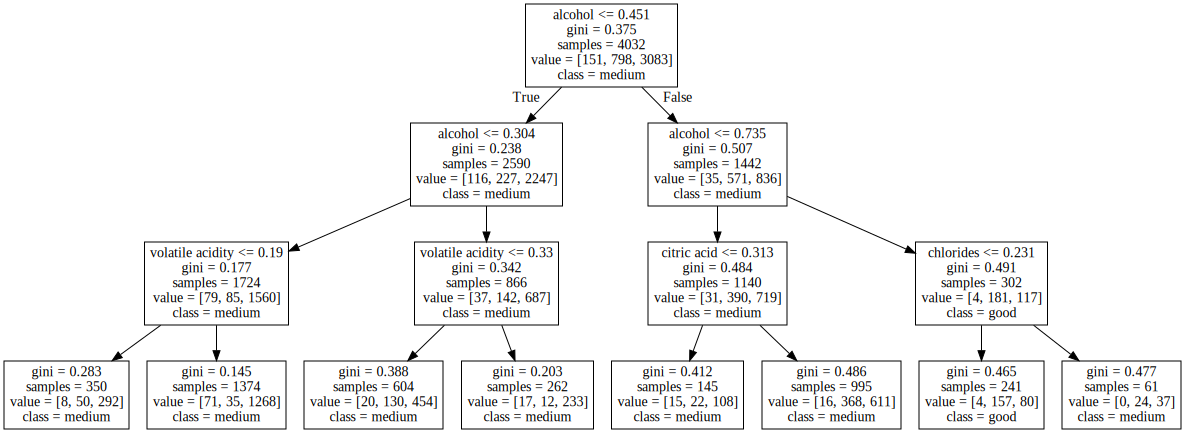

In [65]:
graphviz.Source(export_graphviz(best_tree, 
                                out_file=None,
                                feature_names=df.columns,
                                class_names = [ 'bad', 'good','medium']))

### Oversampling

In [ ]:
oversample = SMOTE({'bad': 1000, 'good': 1500, 'medium': 3800}, 
                   k_neighbors=3, random_state=42)

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

### Random Forest

In [66]:
#Random forest with cross validation oversampled data
param_grid = {'max_depth': range(2, 15), 
              'min_samples_split': [2, 4, 6, 8, 10], 
              'n_estimators' : range(10, 51, 10)}
 
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=2, verbose=1)
grid.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 325 candidates, totalling 3250 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_depth': range(2, 15),
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': range(10, 51, 10)},
             verbose=1)

In [67]:
best_rf = grid.best_estimator_

In [68]:
print('Oversampled random forest\n', classification_report(y_test, best_rf.predict(X_test)))

Oversampled random forest
               precision    recall  f1-score   support

         bad       0.32      0.22      0.26        32
        good       0.59      0.41      0.48       192
      medium       0.84      0.91      0.87       785

    accuracy                           0.79      1009
   macro avg       0.58      0.51      0.54      1009
weighted avg       0.77      0.79      0.78      1009



In [87]:
def plot_trees(n_trees=5):
    r_f = RandomForestClassifier(n_estimators = n_trees)
    mse = np.zeros(n_trees)
    train_err = np.zeros(n_trees)

    for n in range(1, n_trees):
        r_f.set_params(n_estimators=n)
        r_f.fit(X_train_smote, y_train_smote)
        mse[n-1] = metrics.accuracy_score(y_test, r_f.predict(X_test))
        train_err[n-1] = metrics.accuracy_score(y_train_smote, r_f.predict(X_train_smote))
    plt.plot(mse) 
    plt.plot(train_err)
    plt.legend(['Test','Train'])
    plt.xlabel('trees')
    plt.ylabel('Accuracy')
        

    
interact(plot_trees, n_trees=IntSlider(min=5, max=40, step=5, description='trees'));

interactive(children=(IntSlider(value=5, description='trees', max=40, min=5, step=5), Output()), _dom_classes=…

### SVM

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly']} 

grid = GridSearchCV(SVC(degree=2), param_grid, cv=10)#n_jobs =2, return_train_score = True, refit = True, verbose = 3)
grid.fit(X_train_smote, y_train_smote)

In [ ]:
best_svm = grid.best_estimator_

In [ ]:
print('SVM oversampled\n', classification_report(y_test, best_svm.predict(X_test)))

### KNN

In [77]:
k_range = list(range(5, 50, 2))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10)
grid.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49],
                         'weights': ['uniform', 'distance']})

In [78]:
best_knn = grid.best_estimator_

In [79]:
print('Knn oversampled\n', classification_report(y_test, best_knn.predict(X_test)))

Knn oversampled
               precision    recall  f1-score   support

         bad       0.14      0.34      0.19        32
        good       0.49      0.54      0.51       192
      medium       0.85      0.77      0.81       785

    accuracy                           0.72      1009
   macro avg       0.49      0.55      0.51      1009
weighted avg       0.76      0.72      0.73      1009



### Logistic

In [73]:
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [74]:
print('Logistic oversampled\n', classification_report(y_test, lr.predict(X_test)))

Logistic oversampled
               precision    recall  f1-score   support

         bad       0.17      0.25      0.21        32
        good       0.49      0.44      0.46       192
      medium       0.84      0.84      0.84       785

    accuracy                           0.75      1009
   macro avg       0.50      0.51      0.50      1009
weighted avg       0.75      0.75      0.75      1009



### Polynomial Features

In [75]:
# Adding polynomial features
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    lr = LogisticRegression(solver='newton-cg')
    return make_pipeline(PolynomialFeatures(degree), lr)

PR = PolynomialRegression(2)
PR.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])

In [76]:
print('Polynomial oversampled logistic\n', classification_report(y_test, PR.predict(X_test)))

Polynomial oversampled logistic
               precision    recall  f1-score   support

         bad       0.22      0.31      0.26        32
        good       0.52      0.44      0.47       192
      medium       0.84      0.86      0.85       785

    accuracy                           0.76      1009
   macro avg       0.53      0.54      0.53      1009
weighted avg       0.76      0.76      0.76      1009

